In [309]:
#Following code processed data into
#4 parameters
#1. peak force or amplitude
#2. frequency or contractions/hour (via graphs)
#3. duration of contractions
#4. relaxation time

In [1]:
#packages

#import python packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import peak_widths
import peakutils

In [2]:
#assigning filename handles to filenames

#assign filename variable
#example input: 2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv
filename = input("Input filename:" )
#assign variable for excel reference file
ref_filename = "./Myometrial Contractility Reference.txt"
#assign variable for comments file
comments_filename = filename[0:-4] + "_comments" + ".txt"

Input filename:2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv


In [3]:
#importing files and processing

#import muscle bath tsv file
df_file = pd.read_csv(filename, sep='\t')
#import data from excel reference file
df_ref = pd.read_csv(ref_filename, sep='\t')
#import corresponding comments file
comments_file = open(comments_filename,'r')
#process comments
cment_time = []
cment_txt = []
for line in comments_file:
    line = line.rstrip()
    line = line.split(sep = '\t')
    cment_time.append(line[0])
    cment_txt.append(line[1])
#drop unneccessary columns from muscle bath force file
df_file = df_file.drop(columns=['Timestamp','Stimulus'])
#set experiment time as index
df_file.set_index('Experiment Time', inplace = True)
#find filename in reference dataframe
df_ref = df_ref[df_ref['Filename'] == filename]
#drop extra columns
df_ref = df_ref[df_ref.columns[0:14]]
#check to see if muscle bundle should be excluded
df_ref = df_ref[df_ref["EXCLUDE SAMPLE"] != 1]
#reset df_ref index, starting at 0
#this enables easier indexing
df_ref.set_index([pd.Index(list(range(len(df_ref))))])

,Filename,Study,Patient,Bath Number,Patient Status,Pitocin,Amount (ml),Treatment,Conc. (ng/ml),Length (mm),Width1(mm),Width2(mm),Mass (mg),EXCLUDE SAMPLE
0,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,1,NaN,1.0,0.05,Adiponectin,100.0,28.21,1.78,2.00,100.0,NaN
1,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,2,NaN,0.0,0.00,TNF_alpha,10.0,22.77,1.99,2.84,100.0,NaN
2,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,3,NaN,1.0,0.05,Control,NaN,23.82,1.98,1.68,46.0,NaN
3,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,4,NaN,0.0,0.00,Adiponectin,100.0,32.81,2.98,1.65,130.0,NaN
4,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,5,NaN,1.0,0.05,TNF_alpha,10.0,25.07,3.16,1.68,108.0,NaN
5,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,6,NaN,0.0,0.00,Control,NaN,24.31,1.72,2.53,85.0,NaN
6,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,7,NaN,1.0,0.05,Adiponectin,100.0,28.13,2.77,1.31,66.0,NaN
7,2018_08_22_Myometrial_Contractility_Study_4_MB...,4,SO5,8,NaN,0.0,0.00,TNF_alpha,10.0,28.24,1.73,1.68,72.0,NaN


In [4]:
#Determining when baseline ends and treatment begins

#print comments with timepoints
for counter, value in enumerate(cment_time):
    print(cment_txt[counter],":",value)
#create a list of the column names where muscle bath force values are stored
Force_list = ["Force1","Force2","Force3","Force4","Force5","Force6","Force7","Force8"]
#create a placeholder list for storing arrays of force data
baseline_array_list = []
#loop through viable muscle baths in study file (df_file) and retrieve baseline force data
#send array of each muscle bath baseline force data to baseline_array_list
#also create a placeholder list for treatment starttime to be later used in treatment peak analysis
treat_time_list = []
count = 0
for bath in df_ref['Bath Number']:
    print('Muscle Bath',bath,':')
    baseline_endtime = int(float(input("What time is treatment added?")))
    if bath < 9:
        baseline_array = (df_file.loc[baseline_endtime-3599:baseline_endtime,Force_list[bath-1]])
    elif bath > 16:
        baseline_array = (df_file.loc[baseline_endtime-3599:baseline_endtime,Force_list[bath-17]])
    else:
        baseline_array = (df_file.loc[baseline_endtime-3599:baseline_endtime,Force_list[bath-9]])
    baseline_array_list.append(baseline_array)
    treat_time_list.append(baseline_endtime)
    count += 1

Pitocin Bath 1 : 7379.6
Pitocin Bath 3 : 7420.3
Pitocin Bath 5 : 7446.4
Pitocin Bath 7 : 7472.4
Baseline : 11816.6
Treatment Bath 1 : 15489.1
Treatment Bath 2 : 15550.0
Treatment Bath 5 : 15639.5
Treatment Bath 7 : 15712.7
Treatment Bath 8 : 15754.7
Muscle Bath 1 :
What time is treatment added?15489.1
Muscle Bath 2 :
What time is treatment added?15550.0
Muscle Bath 3 :
What time is treatment added?15639.5
Muscle Bath 4 :
What time is treatment added?15639.5
Muscle Bath 5 :
What time is treatment added?15639.5
Muscle Bath 6 :
What time is treatment added?15712.7
Muscle Bath 7 :
What time is treatment added?15712.7
Muscle Bath 8 :
What time is treatment added?15754.7


In [5]:
len(baseline_array_list[0])

3600

In [6]:
peak_rel_height = 1.0
rel_height = 0.80

# 1 HOUR BASELINE


#### Baseline Graphs

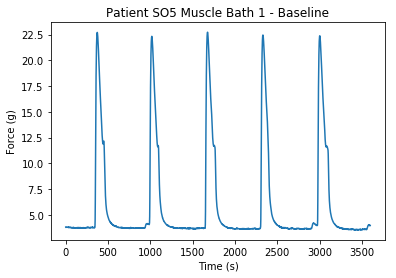

patientSO5_bath1_baseline.pdf


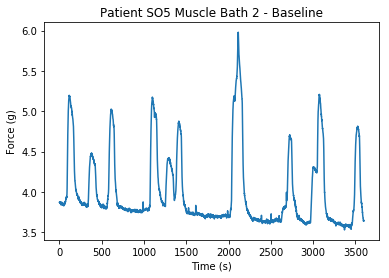

patientSO5_bath2_baseline.pdf


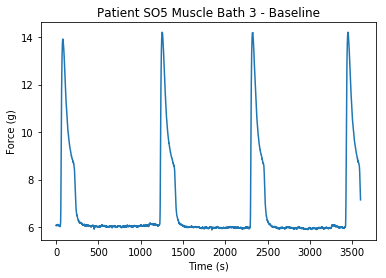

patientSO5_bath3_baseline.pdf


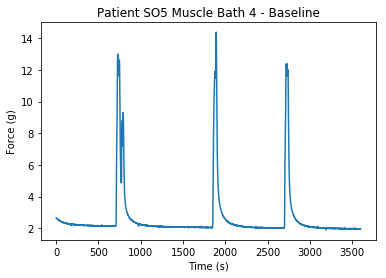

patientSO5_bath4_baseline.pdf


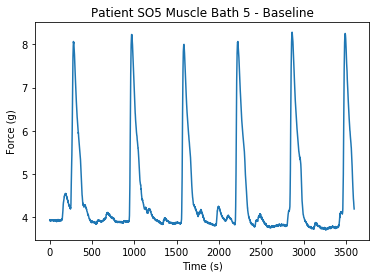

patientSO5_bath5_baseline.pdf


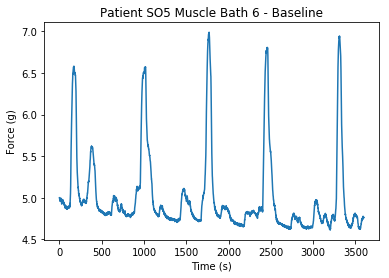

patientSO5_bath6_baseline.pdf


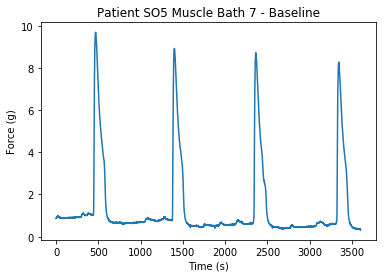

patientSO5_bath7_baseline.pdf


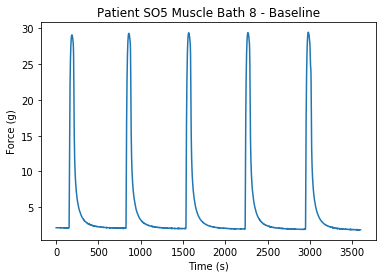

patientSO5_bath8_baseline.pdf


In [7]:
##### Graphs for 1 hour baseline

#plot the baseline contraction force data from
#for bath in df_ref['Bath Number']:
for i in range(len(baseline_array_list)):        
    bath = df_ref.iloc[i]["Bath Number"]
    #print("Muscle Bath",bath)
    f = plt.figure()
    plt.plot(np.array(baseline_array_list[i]))
    plt.title("Patient "+list(df_ref['Patient'])[i]+" Muscle Bath "+str(bath)+" - Baseline")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    plt.show()
    #save baseline plots as pdf file
    savestring = "patient"+(list(df_ref['Patient'])[i])+"_"+"bath"+str(bath)+"_baseline"+'.pdf'
    print(savestring)
    f.savefig('baseline_graphs/'+savestring,sep = '')

#### Edge Clipping

Before Edge Clipping


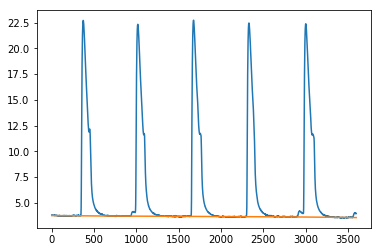

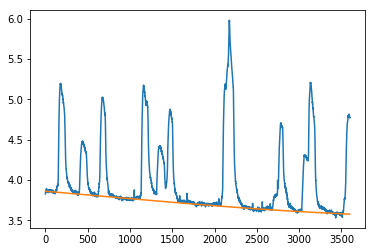

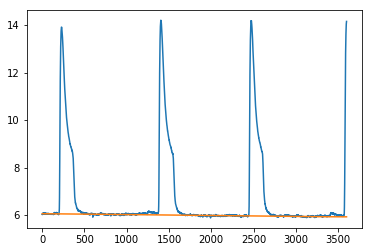

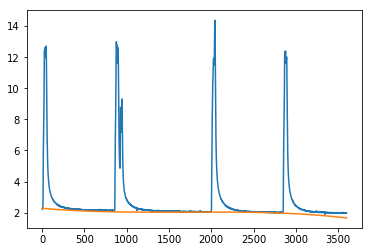

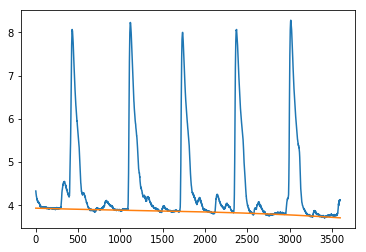

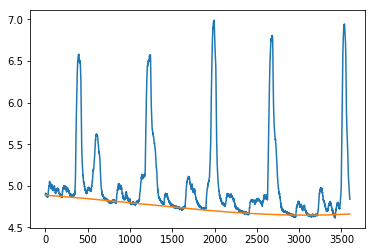

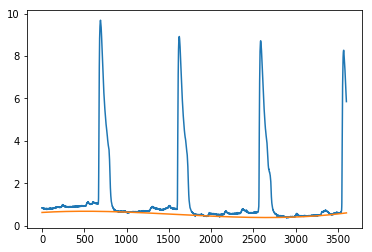

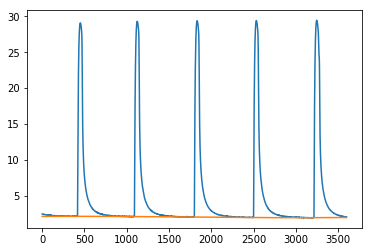

After Edge Clipping


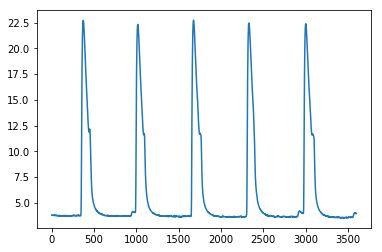

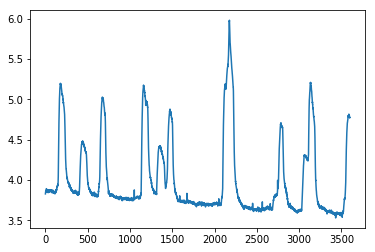

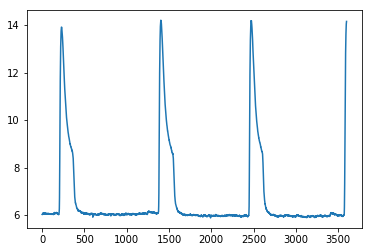

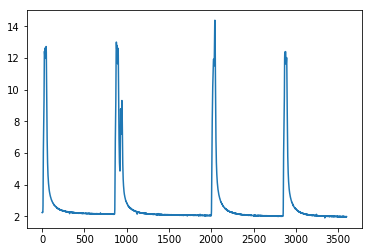

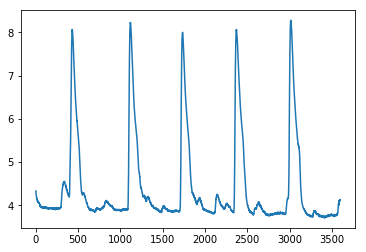

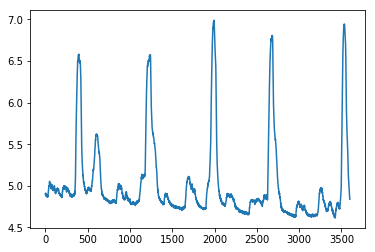

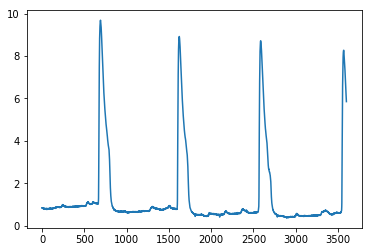

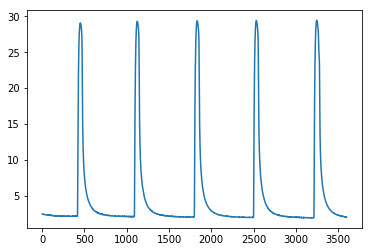

In [9]:
#plot muscle bath baseline contractions; overlay baseline/passive tension
print("Before Edge Clipping")
for mb in range(len(baseline_array_list)):
    baseline_array_list[mb] = (np.array(baseline_array_list[mb]))
    plt.plot((baseline_array_list[mb]))
    plt.plot(peakutils.baseline(np.array(baseline_array_list[mb])))
    plt.show()

#edge clipping
#baseline_array_list[3][0:300] = peakutils.baseline(np.array(baseline_array_list[3]))[0:300]
#baseline_array_list[0][0:250] = peakutils.baseline(np.array(baseline_array_list[0]))[0:250]
#baseline_array_list[3][0:450] = peakutils.baseline(np.array(baseline_array_list[3]))[0:450]

#baseline_array_list[4][0:250] = peakutils.baseline(np.array(baseline_array_list[4]))[0:250]
#baseline_array_list[1][-1] = peakutils.baseline(np.array(baseline_array_list[1]))[1800]
#baseline_array_list[7][3000:] = peakutils.baseline(np.array(baseline_array_list[7]))[3000:]

#baseline_array_list[1][-1] = peakutils.baseline(np.array(baseline_array_list[1]))[1800]


#replotting graphs to see the effect of clipping the edges
print("After Edge Clipping")
for mb in range(len(baseline_array_list)):
    plt.plot((baseline_array_list[mb]))
    plt.show()   

#### Find Peaks

In [10]:
baseline_width_var = 10

In [11]:
#loop through muscle baths in reference dataframe 
    #for each bath listed in the reference file, find the local max 
    #for the 1 hr of baseline in the muscle bath file
    #ask when baseline ended for each bath and count backwords 1hr
#create storage lists for outputs
locmax_list = []
fp_output_list = []
#for loop for peak analysis
#vary width variable for each study to tune the find_peaks function
#width_var = float(input("input the width variable for find_peaks function:"))
for i in range(len(baseline_array_list)):           
    bath = df_ref.iloc[i]["Bath Number"]
    #print("Muscle Bath",bath,":")
    #input the height cut off for peak analysis
    #print 90% peak level
    #commented out for automatic peak cutoff input:
    #print("25% of peak",max(baseline_array_list[i]) - ((max(baseline_array_list[i])-min(baseline_array_list[i]))*.75))
    #cutoff = float(input("input peak height cutoff:"))
    #automatic calculation of peak cutoff
    peak25 = max(baseline_array_list[i]) - ((max(baseline_array_list[i])-min(baseline_array_list[i]))*.75)
    cutoff = float(peak25)
    #vary width variable for each study to tune the find_peaks function
    #comment out width_var unless need to vary width for each bath
    #width_var = float(input("input the width variable for find_peaks function:"))
    fp_output = find_peaks(np.array(baseline_array_list[(i)]),height = cutoff, width = baseline_width_var, distance = 200)
    locmax = np.array(baseline_array_list[(i)])[fp_output[0]]
    locmax_list.append(locmax)
    fp_output_list.append(fp_output)
    print(fp_output)
    #print("\n")
    
#width variable used for analysis of each study: 




#width_var = 30 for 2018_08_13_Human_Uterine.tsv
#width_var = 30 for 2018_08_13_Myometrial_Contractility_Study_1_MB_9_16.tsv
#width_var = 20 for 2018_08_17_Myometrial_Contractility_Study_3_MB_1_8.tsv
#width_var = 20 for 2018_08_17_Myometrial_Contractility_Study_3_MB_1_8.tsv
#width_var = 20 for 2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv
#width_var = 5 for 2018_08_24_Myometrial_Contractility_Study_5_MB_1_8.tsv
#width_var = 5 for 2018_08_31_Myometrial_Contractility_Study_6_MB_1_8.tsv
#width_var = 20 for 2018_09_05_Myometrial_Contractility_Study_7_MB_1_8.tsv
#width_var = 5 for 2018_09_06_Myometrial_Contractility_Study_8_MB_1_8.tsv
#width_var = 20 for 2018_09_06_Myometrial_Contractility_Study_8_MB_17_24.tsv
#width_var = 20 for 2018_09_12_Myometrial_Contractility_Study_9_MB_9_16.tsv
#width_var = 5 for 2018_09_18_Myometrial_Contractility_Study_10_MB_9_16_Restart_Restart.tsv
#width_var = 5 for 2018_09_18_Myometrial_Contractility_Study_10_MB_17_24.tsv
#width_var = 30 for 2018_09_21_Myometrial_Contractility_Study_11_MB_1_8.tsv
#width_var = 20 for 2018_09_21_Human_Uterine_Stimulation.tsv
#width_var = 30 for 2018_09_21_Myometrial_Contractility_Study_11_MB_17_24.tsv
#width_var = 8 for 2018_09_28_Myometrial_Contractility_Study_13_MB_1_8.tsv
#width_var = 10 for 2018_12_07_Myometrial_Contractility_Study_14_b.tsv

(array([ 371, 1017, 1676, 2331, 3003], dtype=int64), {'peak_heights': array([22.71, 22.33, 22.73, 22.45, 22.39]), 'prominences': array([19.013, 18.67 , 19.133, 18.857, 18.8  ]), 'left_bases': array([ 104,  757, 1511, 2061, 2773], dtype=int64), 'right_bases': array([1511, 1511, 3419, 3419, 3419], dtype=int64), 'widths': array([73.36527039, 75.12037037, 75.5745694 , 76.40619883, 78.65058712]), 'width_heights': array([13.2035, 12.995 , 13.1635, 13.0215, 12.99  ]), 'left_ips': array([ 353.30035461,  998.12962963, 1657.12304965, 2312.11222222,
       2984.2189781 ]), 'right_ips': array([ 426.665625  , 1073.25      , 1732.69761905, 2388.51842105,
       3062.86956522])})
(array([ 177,  443,  673, 1160, 1473, 2176, 2786, 3134], dtype=int64), {'peak_heights': array([5.198, 4.481, 5.027, 5.176, 4.878, 5.98 , 4.706, 5.209]), 'prominences': array([1.371, 0.671, 1.237, 1.434, 1.058, 2.315, 1.104, 1.618]), 'left_bases': array([ 112,  383,  617,  908, 1314, 1893, 2549, 2975], dtype=int64), 'right_ba

In [12]:
# processing find_peaks output
#assigning values from find peaks output to a list of local max indices 
locmax_indx_list = []
for i in range(len(fp_output_list)):
    locmax_indx_list.append(fp_output_list[i][0])
#assigning values from find peaks dictionary ouput to a list (to later be used with calculating duration of contractions, relaxation time, etc.)
locmax_dic_list = []
for i in range(len(fp_output_list)):
    locmax_dic_list.append(fp_output_list[i][1])


#### Peak Analysis Graphs

Muscle Bath 1
104 104.0
757 757.0
1511 1511.0
2061 2061.0
2773 2773.0


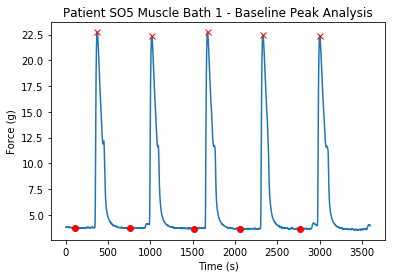

saved as: peakanalysisgraph_patientSO5_bath1_baseline.pdf
contraction baseline forces: [3.697 3.66  3.597 3.593 3.59 ]
contraction peak forces: [22.71 22.33 22.73 22.45 22.39]
(array([581.95238095, 600.77777778, 549.85185185, 711.92857143,
       543.33333333]), array([3.697, 3.66 , 3.597, 3.593, 3.59 ]), array([ 104.,  757., 1511., 2061., 2773.]), array([ 685.95238095, 1357.77777778, 2060.85185185, 2772.92857143,
       3316.33333333]))
Muscle Bath 2
112 112.0
383 383.0
617 617.0
908 908.0
1314 1314.0
1893 1893.0
2549 2549.0
2975 2975.0


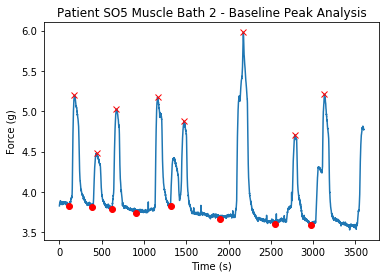

saved as: peakanalysisgraph_patientSO5_bath2_baseline.pdf
contraction baseline forces: [3.827 3.81  3.79  3.742 3.82  3.665 3.602 3.591]
contraction peak forces: [5.198 4.481 5.027 5.176 4.878 5.98  4.706 5.209]
(array([261.5       , 168.        , 190.90909091, 657.7       ,
       233.42857143, 441.75      , 423.5       , 354.60606061]), array([3.827, 3.81 , 3.79 , 3.742, 3.82 , 3.665, 3.602, 3.591]), array([ 112.,  383.,  617.,  908., 1314., 1893., 2549., 2975.]), array([ 373.5       ,  551.        ,  807.90909091, 1565.7       ,
       1547.42857143, 2334.75      , 2972.5       , 3329.60606061]))
Muscle Bath 3
1 1.0
599 599.0
1991 1991.1237113402062


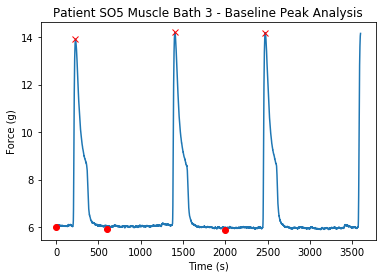

saved as: peakanalysisgraph_patientSO5_bath3_baseline.pdf
contraction baseline forces: [6.018 5.912 5.892]
contraction peak forces: [13.91 14.2  14.18]
(array([ 559.59090909, 1391.67346939, 1232.87628866]), array([6.018, 5.912, 5.892]), array([1.00000000e+00, 5.99000000e+02, 1.99112371e+03]), array([ 560.59090909, 1990.67346939, 3224.        ]))
Muscle Bath 4
0 0.0
844 844.0
1718 1718.0
2822 2822.0


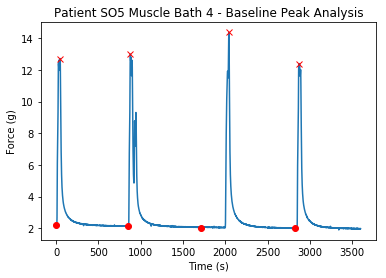

saved as: peakanalysisgraph_patientSO5_bath4_baseline.pdf
contraction baseline forces: [2.234 2.119 2.03  1.989]
contraction peak forces: [12.72 13.   14.38 12.4 ]
(array([323.30693069, 465.33333333, 806.7       , 519.20338983]), array([2.234, 2.119, 2.03 , 1.989]), array([   0.,  844., 1718., 2822.]), array([ 323.30693069, 1309.33333333, 2524.7       , 3341.20338983]))
Muscle Bath 5
231 231.00000000000003
692 692.0
1484 1484.0
2096 2096.0
2763 2763.0


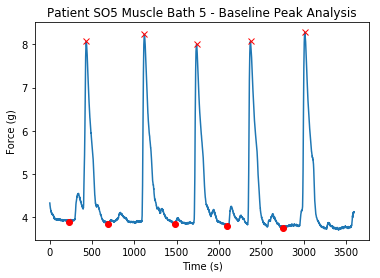

saved as: peakanalysisgraph_patientSO5_bath5_baseline.pdf
contraction baseline forces: [3.897 3.847 3.834 3.801 3.758]
contraction peak forces: [8.067 8.229 8.    8.067 8.281]
(array([406.        , 783.8       , 574.89473684, 466.47368421,
       479.        ]), array([3.897, 3.847, 3.834, 3.801, 3.758]), array([ 231.,  692., 1484., 2096., 2763.]), array([ 637.        , 1475.8       , 2058.89473684, 2562.47368421,
       3242.        ]))
Muscle Bath 6
191 191.0
485 485.0
1063 1063.0
1612 1612.0
2399 2399.0
3489 3489.344827586207


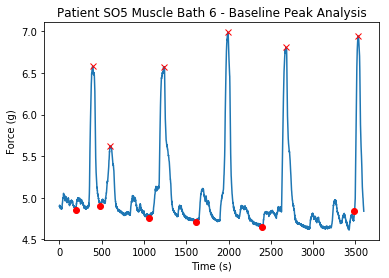

saved as: peakanalysisgraph_patientSO5_bath6_baseline.pdf
contraction baseline forces: [4.858 4.903 4.763 4.704 4.652 4.839]
contraction peak forces: [6.582 5.623 6.574 6.99  6.807 6.942]
(array([496.85714286, 185.91666667, 432.63636364, 672.76923077,
       490.625     , 109.65517241]), array([4.858, 4.903, 4.763, 4.704, 4.652, 4.839]), array([ 191.        ,  485.        , 1063.        , 1612.        ,
       2399.        , 3489.34482759]), array([ 687.85714286,  670.91666667, 1495.63636364, 2284.76923077,
       2889.625     , 3599.        ]))
Muscle Bath 7
57 57.00000000000002
1023 1023.0
2100 2100.0
3552 3552.251497005988


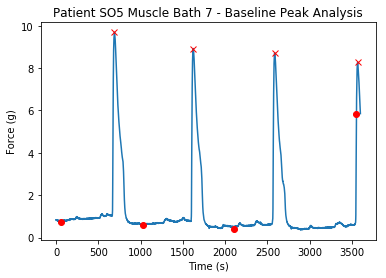

saved as: peakanalysisgraph_patientSO5_bath7_baseline.pdf
contraction baseline forces: [0.7558 0.6044 0.4018 5.852 ]
contraction peak forces: [9.693 8.924 8.725 8.276]
(array([794.77619048, 756.66666667, 767.79828326,  46.74850299]), array([0.7558, 0.6044, 0.4018, 5.852 ]), array([  57.        , 1023.        , 2100.        , 3552.25149701]), array([ 851.77619048, 1779.66666667, 2867.79828326, 3599.        ]))
Muscle Bath 8
392 392.00000000000006
1057 1057.1747572815534
1057 1057.0
2490 2490.0
3213 3213.0545454545454


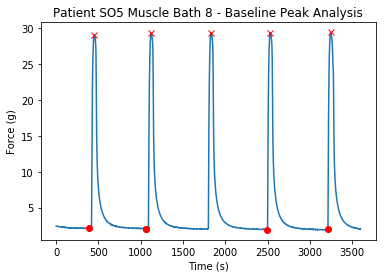

saved as: peakanalysisgraph_patientSO5_bath8_baseline.pdf
contraction baseline forces: [2.094 1.999 1.981 1.937 1.957]
contraction peak forces: [29.1  29.32 29.4  29.42 29.47]
(array([ 546.83333333,  679.82524272, 1279.85185185,  575.        ,
        375.94545455]), array([2.094, 1.999, 1.981, 1.937, 1.957]), array([ 392.        , 1057.17475728, 1057.        , 2490.        ,
       3213.05454545]), array([ 938.83333333, 1737.        , 2336.85185185, 3065.        ,
       3589.        ]))


In [13]:
#contraction baseline force determination, peak analysis graphs

#create list for contraction baseline forces
base = []
#loop through muscle baths 
for mb in range(len(df_ref)):
    #determine bath number
    bath = df_ref.iloc[mb]["Bath Number"]
    print("Muscle Bath",bath)
    #create figure to plot on
    f = plt.figure()
    #plot baseline force data for each muscle bath
    plt.plot(np.array(baseline_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Baseline Peak Analysis")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    #use peak_widths function to determine the widths of contractions
    widths = peak_widths(baseline_array_list[mb],locmax_indx_list[mb],rel_height = peak_rel_height)
    #create storage list for contraction baseline force
    storagelist = []
    #loop through each contraction, use info stored in widths variable
    #from the peak_widths function to determine the left baseline force 
    for contract_num in range(len(locmax_indx_list[mb])):
        #determine left baseline indx
        left_basex = int(widths[2][contract_num])
        print(left_basex,widths[2][contract_num])
        #determine left baseline force
        #left_basey = np.array(baseline_array_list[mb])[left_basex]
        #use interpolated width height
        left_basey = widths[1][contract_num]
        #plot left baseline force on plot
        plt.plot(left_basex,left_basey,'ro')
        #store this muscle baths contraction baseline forces
        storagelist.append(left_basey)
    #loop through contraction peaks and plot the maximum
    for counter, peak in enumerate(locmax_list[mb]):
        plt.plot(locmax_indx_list[mb][counter],peak,'rx')
    plt.show()
    #save plots as pdf
    savestring = "peakanalysisgraph_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_baseline"+'.pdf'
    print("saved as:",savestring)
    f.savefig('baseline_graphs/'+savestring,sep = '')
    #store contraction baseline forces
    base.append(np.array(storagelist))
    print("contraction baseline forces:",base[mb])
    print("contraction peak forces:",locmax_list[mb])
    print(widths)

#### Peak Force Amplitude & Peak Force Amplitude Corrected to CSA

In [326]:
#baseline peak force calculations

#create an empty list to store raw forces and titles
raw_force_list = []
forcetitles = []
#calculate baseline peak forces
for x in range(len(locmax_list)):
    #create a temporary list to store values for each muscle bath
    templist = []
    bath = df_ref.iloc[x]["Bath Number"]
    title = "bath" + str(bath) +" force (g)"
    forcetitles.append(title)
    for contract in range(len(locmax_list[x])):
        amp = (locmax_list[x][contract]-base[x][contract])
        #2 decimal places
        amp = float("%.2f" % amp)
        templist.append(amp)
    raw_force_list.append(np.array(templist))
    print("raw forces:",raw_force_list[x])
#make a dictionary out of titles and raw forces    
rawforcedic = dict(zip(forcetitles, raw_force_list))
#for each muscle bath calculate the average raw peak value during baseline
#this will be used for treatment peak normalization
#create empty storage lists 
basepeakmean = []
#for loop calculation 
for bath in range(len(raw_force_list)):
    basepeakmean.append(raw_force_list[bath].mean())  
#calculate cross-sectional area (CSA)
CSA_list = []
for bath in df_ref['Bath Number']:
    length = float(df_ref[df_ref['Bath Number']== bath]['Length (mm)'])
    mass = float(df_ref[df_ref['Bath Number']== bath]['Mass (mg)'])   
    CSA = ((mass*.001)/(1.056*length*.1)) * 100       #CSA in mm2
    CSA_list.append(CSA)
print("CSA:",(CSA_list))
#create an empty list to store CSA normalized forces and titles
norm_force_list = []
normtitles = []
#calculate CSA normalized baseline peak forces
for x in range(len(locmax_list)):
    #create a temporary list to store values for each muscle bath
    templist = []
    bath = df_ref.iloc[x]["Bath Number"]
    title = "bath" + str(bath) +" norm. to CSA (g/mm2)"
    normtitles.append(title)
    for contraction in range(len(locmax_list[x])):
        norm = ((locmax_list[x][contraction]-base[x][contraction])/CSA_list[x])
        norm = float("%.2f" % norm)
        templist.append(norm)
    norm_force_list.append(np.array(templist))
    print("corrected to CSA:",norm_force_list[x])
#make a dictionary out of titles and raw forces    
normforcedic = dict(zip(normtitles, norm_force_list))


raw forces: [22.96 22.94 23.04 21.68 22.3  23.02 22.79 23.08]
raw forces: [15.14 15.4  15.6  15.35 15.8  15.81]
CSA: [1.3692192446856624, 1.362862609380715]
corrected to CSA: [16.77 16.75 16.83 15.84 16.28 16.81 16.65 16.86]
corrected to CSA: [11.11 11.3  11.45 11.27 11.59 11.6 ]


#### Contraction Durations

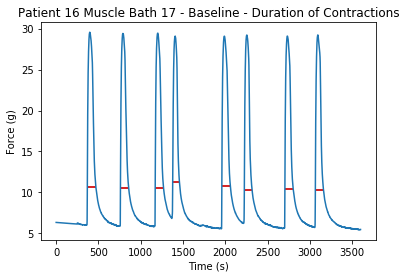

saved as: contractduration_patient16_bath17_baseline.pdf
peak durations: [100  96  98  79 100  91  98  96]


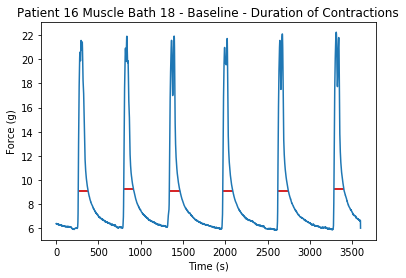

saved as: contractduration_patient16_bath18_baseline.pdf
peak durations: [115 114 126 118 123 117]


In [327]:
#calculate duration of contractions
peakduration = []
base_duration_titles = []
for mb in range(len(baseline_array_list)):
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" duration times (s)"
    base_duration_titles.append(title)
    templist = []
    #create figure to plot on
    f = plt.figure()
    plt.plot(np.array(baseline_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Baseline - Duration of Contractions")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    widths = peak_widths(baseline_array_list[mb],locmax_indx_list[mb],rel_height=rel_height)
    for contraction in range(len(locmax_list[mb])):
        leftx = ((widths[2][contraction]))
        rightx = ((widths[3][contraction]))
        templist.append(int(rightx-leftx))
        plt.hlines(*widths[1:], color="C3")
    plt.show()
    peakduration.append(np.array(templist))
    #save plots as pdf
    savestring = "contractduration_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_baseline"+'.pdf'
    print("saved as:",savestring)
    print("peak durations:",peakduration[mb])
    f.savefig('baseline_graphs/'+savestring,sep = '')
#make a dictionary for baseline contractions duration time    
base_contract_dur_time = dict(zip(base_duration_titles,peakduration))

#### Relaxation Time

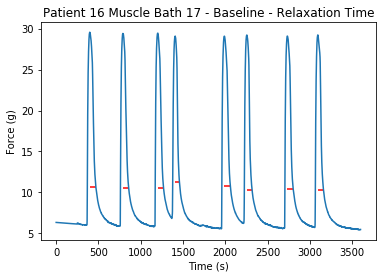

saved as: relaxtime_patient16_bath17_baseline.pdf
relax times: [71 68 68 49 71 63 69 67]


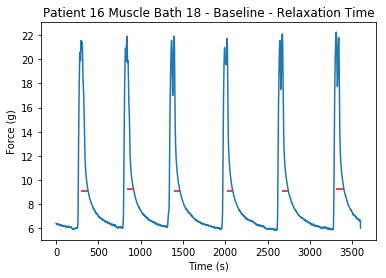

saved as: relaxtime_patient16_bath18_baseline.pdf
relax times: [81 76 68 65 70 89]


In [328]:
#relaxation time
relaxtitle = []
relax_time = []
for mb in range(len(baseline_array_list)):
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" relaxation times (s)"
    relaxtitle.append(title)
    widths = peak_widths(baseline_array_list[mb],locmax_indx_list[mb],rel_height=rel_height)
    relax = widths[3]-locmax_indx_list[mb]
    relax = relax.astype(int)
    relax_time.append(relax)
    #create figure to plot on
    f = plt.figure()
    plt.plot(np.array(baseline_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Baseline - Relaxation Time")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    for contract_num in range(len(locmax_indx_list[mb])):
        #determine left baseline indx
        right_basex = int(widths[3][contract_num])
        #determine left baseline force
        #right_basey = np.array(baseline_array_list[mb])[right_basex]
        right_basey = widths[1][contract_num]
        #plot left baseline force on plot
        plt.hlines(right_basey,locmax_indx_list[mb][contract_num],right_basex, colors= 'r')
    plt.show()
    #save plots as pdf
    savestring = "relaxtime_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_baseline"+'.pdf'
    print("saved as:",savestring)
    f.savefig('baseline_graphs/'+savestring,sep = '')
    print("relax times:",relax_time[mb])
#make a dictionary for baseline contractions duration time    
base_relax_time = dict(zip(relaxtitle,relax_time))

#### Baseline Excel Spreadsheet

In [329]:
#sending baseline data to Excel spreadsheet

#create a dataframe to store raw force data
df_raw = pd.DataFrame.from_dict(rawforcedic, orient='index')
df_raw = df_raw.transpose()
#create a dataframe to store normalized data
df_norm = pd.DataFrame.from_dict(normforcedic, orient='index')
df_norm = df_norm.transpose()
#create a dataframe to store contraction duration time data
df_base_contract_dur = pd.DataFrame.from_dict(base_contract_dur_time, orient='index')
df_base_contract_dur = df_base_contract_dur.transpose()
#create a dataframe to store contraction relaxation time data
df_base_relax = pd.DataFrame.from_dict(base_relax_time, orient='index')
df_base_relax = df_base_relax.transpose()
#create output baseline dataframe
df_base_out = df_raw.join(df_norm)
df_base_out = df_base_out.join(df_base_contract_dur)
df_base_out = df_base_out.join(df_base_relax)
print(df_base_out.head())
#determine which set of muscle baths were used
if df_ref["Bath Number"].max() > 16:
    computer = "comp3"
elif df_ref["Bath Number"].max() < 9:
    computer = "comp1"
else: 
    computer = "comp2"
#write baseline dataframe to Excel spreadsheet
#assume tissue in set of 8 muscle baths comes from the 
#same patient 
base_out_file = "Patient"+ list(df_ref['Patient'])[0] +"_baseline_"+computer+".xlsx"
df_base_out.to_excel('baseline_output_files/'+base_out_file)
print("saved as:",base_out_file)

   bath17 force (g)  bath18 force (g)  bath17 norm. to CSA (g/mm2)  \
0             22.96             15.14                        16.77   
1             22.94             15.40                        16.75   
2             23.04             15.60                        16.83   
3             21.68             15.35                        15.84   
4             22.30             15.80                        16.28   

   bath18 norm. to CSA (g/mm2)  bath17 duration times (s)  \
0                        11.11                      100.0   
1                        11.30                       96.0   
2                        11.45                       98.0   
3                        11.27                       79.0   
4                        11.59                      100.0   

   bath18 duration times (s)  bath17 relaxation times (s)  \
0                      115.0                         71.0   
1                      114.0                         68.0   
2                      126.0 

## 1 HOUR TREATMENT

#### Treatment Graphs

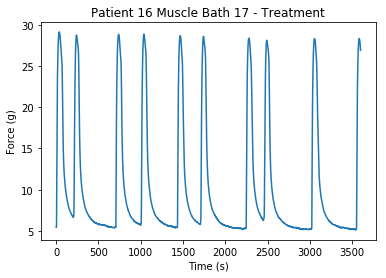

patient16_bath17_treatment.pdf


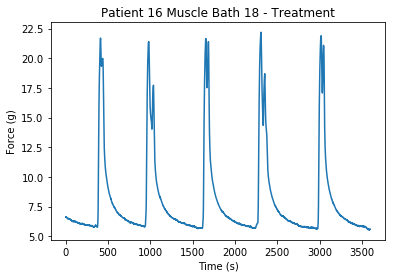

patient16_bath18_treatment.pdf


In [330]:
#create a placeholder list for storing arrays of treatment force data
treat_array_list = []
#loop through viable muscle baths in study file (df_file) and retrieve treatment force data
#send array of each muscle bath treatment force data to treat_array_list
count = 0
for bath in df_ref['Bath Number']:
   
    if bath < 9:
        treatment_array = (df_file.loc[treat_time_list[count]:treat_time_list[count]+3599,Force_list[bath-1]])
       
    elif bath > 16: 
        #treatment_array = (df_file.loc[treat_time_list[count]:treat_time_list[count]+3599,Force_list[bath-17]])
        treatment_array = (df_file.loc[treat_time_list[count]:treat_time_list[count]+3599,Force_list[bath-17]])
    else:
        treatment_array = (df_file.loc[treat_time_list[count]:treat_time_list[count]+3599,Force_list[bath-9]])
    
    treat_array_list.append(treatment_array)
    count += 1
#plot the treatment contraction force data
for i in range(len(treat_array_list)):        
    bath = df_ref.iloc[i]["Bath Number"]
    #print("Muscle Bath",bath)
    f = plt.figure()
    plt.plot(np.array(treat_array_list[i]))
    plt.title("Patient "+list(df_ref['Patient'])[i]+" Muscle Bath "+str(bath)+" - Treatment")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    plt.show()
    savestring = "patient"+(list(df_ref['Patient'])[i])+"_"+"bath"+str(bath)+"_treatment"+'.pdf'
    print(savestring)
    f.savefig('treatment_graphs/'+savestring,sep = '')

In [332]:
len(treat_array_list[0]),len(treat_array_list[1])
#len(treat_array_list[2]),len(treat_array_list[3])

(3600, 3600)

#### Edge Clipping

Before Edge Clipping


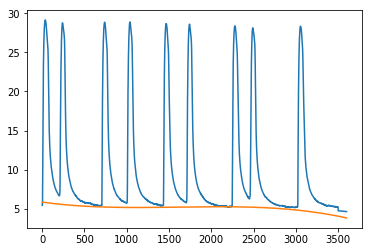

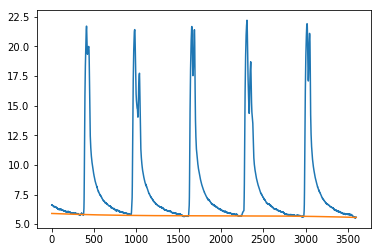

After Edge Clipping


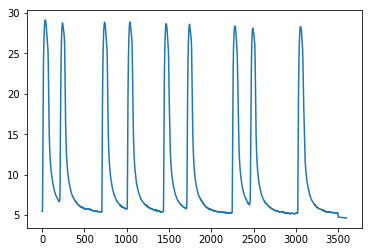

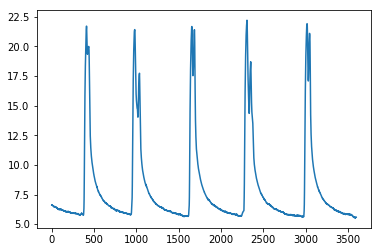

In [335]:
#plot muscle bath baseline contractions; overlay baseline/passive tension
print("Before Edge Clipping")
for mb in range(len(treat_array_list)):
    treat_array_list[mb] = (np.array(treat_array_list[mb]))
    plt.plot((treat_array_list[mb]))
    plt.plot(peakutils.baseline(np.array(treat_array_list[mb])))
    plt.show()

#edge clipping

#treat_array_list[0][3500:] = peakutils.baseline(np.array(treat_array_list[0]))[3500:]
#treat_array_list[3][0:500] = peakutils.baseline(np.array(treat_array_list[3]))[0:500]
#treat_array_list[5][-1] = peakutils.baseline(np.array(treat_array_list[5]))[1800]
#treat_array_list[2][0:300] = peakutils.baseline(np.array(treat_array_list[2]))[0:300]
#treat_array_list[5][-1] = peakutils.baseline(np.array(treat_array_list[5]))[-1]
#treat_array_list[4][0:250] = peakutils.baseline(np.array(treat_array_list[4]))[0:250]
#treat_array_list[6][-1] = peakutils.baseline(np.array(treat_array_list[6]))[-1]
#treat_array_list[7][-1] = peakutils.baseline(np.array(treat_array_list[7]))[3000]
#treat_array_list[1][0:300] = peakutils.baseline(np.array(treat_array_list[1]))[0:300]




#replotting graphs to see the effect of clipping the edges
print("After Edge Clipping")
for mb in range(len(treat_array_list)):
    plt.plot((treat_array_list[mb]))
    plt.show()   

#### Find Peaks

In [336]:
treatment_width_var=10

In [340]:
#peak analysis for 1 hour treatment
#create storage lists for outputs
treat_locmax_list = []
fp_treat_output_list = []
#for loop for peak analysis
#reuse the width variable defined earlier for baseline peak analysis
for i in range(len(treat_array_list)):           
    bath = df_ref.iloc[i]["Bath Number"]
    #comment out for automatic peak detection
    #print("Muscle Bath",bath,":")
    #print 90% peak level
    #print("25% of peak",max(treat_array_list[i]) - ((max(treat_array_list[i])-min(treat_array_list[i]))*.75))
    #input the height cut off for peak analysis
    #cutoff = float(input("input peak height cutoff:"))
    #automatically determine peak cutoff height 
    peak25 = max(treat_array_list[i][1:-1]) - ((max(treat_array_list[i][1:-1])-min(treat_array_list[i][1:-1]))*.75)
    cutoff = float(peak25)
    #vary width variable for each study to tune the find_peaks function
    #comment out width_var unless need to vary width for each bath
    #width_var = float(input("input the width variable for find_peaks function:"))
    fp_output = find_peaks(np.array(treat_array_list[(i)]),height = cutoff, width = treatment_width_var,distance = 200)
    locmax = np.array(treat_array_list[(i)])[fp_output[0]]
    treat_locmax_list.append(locmax)
    fp_treat_output_list.append(fp_output)
    #print(fp_output)
    #print("\n")


In [341]:
#processing find_peaks output
#assigning values from find peaks output to a list of local max indices 
locmax_indx_treat_list = []
for i in range(len(fp_treat_output_list)):
    locmax_indx_treat_list.append(fp_treat_output_list[i][0])
#assigning values from find peaks dictionary ouput to a list (to later be used with calculating duration of contractions, relaxation time, etc.)
locmax_dic_treat_list = []
for i in range(len(fp_treat_output_list)):
    locmax_dic_treat_list.append(fp_treat_output_list[i][1])
    

#### Peak Analysis Graphs

Muscle Bath 17


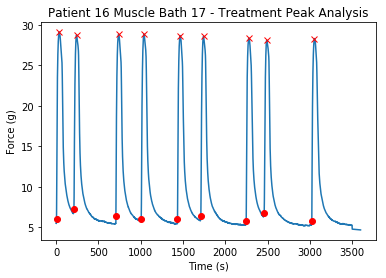

saved as: peakanalysisgraph_patient16_bath17_treatment.pdf
peak forces: [29.1  28.77 28.85 28.88 28.68 28.59 28.39 28.12 28.32]
contraction baseline forces: [6.063675 7.22055  6.314825 5.982125 5.982    6.351225 5.802175 6.8065
 5.730225]
Muscle Bath 18


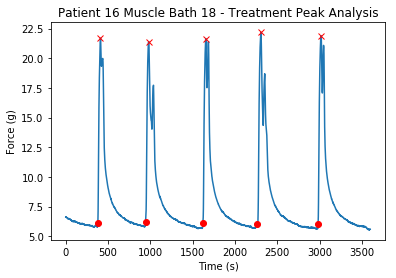

saved as: peakanalysisgraph_patient16_bath18_treatment.pdf
peak forces: [21.69 21.4  21.66 22.19 21.9 ]
contraction baseline forces: [6.145575 6.181225 6.068775 6.052775 6.03285 ]


In [342]:
#contraction baseline force determination, peak analysis graphs

#create a list for contration baseline forces
base_treat = []
#loop through muscle baths
for mb in range(len(df_ref)):
    #determine bath number
    bath = df_ref.iloc[mb]["Bath Number"]
    print("Muscle Bath",bath)
    #create figure to plot on
    f = plt.figure()
    #plot baseline force data for each muscle bath
    plt.plot(np.array(treat_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Treatment Peak Analysis")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    #use peak_widths function to determine the widths of contractions
    widths = peak_widths(treat_array_list[mb],locmax_indx_treat_list[mb],rel_height=peak_rel_height)
    #create storage list for contraction baseline force
    storagelist = []
    #loop through each contraction, use info stored in widths variable
    #from the peak_widths function to determine the left baseline force 
    for contract_num in range(len(locmax_indx_treat_list[mb])):
        #determine left baseline indx
        left_basex = int(widths[2][contract_num])
        #determine left baseline force
        #left_basey = np.array(treat_array_list[mb])[left_basex]
        #use interpolated y position
        left_basey = widths[1][contract_num]
        #plot left baseline force on plot
        plt.plot(left_basex,left_basey,'ro')
        #store this muscle baths contraction baseline forces
        storagelist.append(left_basey)
        #loop through contraction peaks and plot the maximum
    for counter, peak in enumerate(treat_locmax_list[mb]):
        plt.plot(locmax_indx_treat_list[mb][counter],peak,'rx')
    plt.show()
    #save plots as pdf
    savestring = "peakanalysisgraph_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_treatment"+'.pdf'
    print("saved as:",savestring)
    f.savefig('treatment_graphs/'+savestring,sep = '')
    #store contraction baseline forces
    base_treat.append(np.array(storagelist))
    print("peak forces:",treat_locmax_list[mb])
    print("contraction baseline forces:",base_treat[mb])   

#### Peak Force Amplitude & Peak Force Amplitude Corrected to CSA

In [343]:
#treatment peak force calculations
#create an empty list to store the raw treatment peak values
treatpeakvals = []
treatpeaktitles = []
#calculate treatment peak forces
for mb in range(len(treat_locmax_list)):
    #create a temporary list to store each contraction peak for current muscle bath
    templist = []
    for contraction in range(len(treat_locmax_list[mb])):
        amplitude = (treat_locmax_list[mb][contraction]-base_treat[mb][contraction])
        amplitude = float("%.2f" % amplitude)
        templist.append(amplitude)
    treatpeakvals.append(np.array(templist))
    print("contraction amp:",treatpeakvals[mb])
    #create a title for these values. store them in a list 
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" force (g)"
    treatpeaktitles.append(title)
#normalizing to baseline function
#create an empty list to store the normalized treatment peak values and titles
normalized_treatment_peaks = []
normtreatpeaktitles = []
#normalize forces to baseline average peak force
for mb in range(len(treatpeakvals)):
    peaks_norm_2_base_function = treatpeakvals[mb]/basepeakmean[mb]
    normalized_treatment_peaks.append(peaks_norm_2_base_function)
    print("norm to baseline function:",normalized_treatment_peaks)
    #normalized treatment peaks titles (for column labels in Excel file)
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" norm. to baseline function"
    normtreatpeaktitles.append(title)
#normalize forces to CSA    
#create an empty list to store CSA normalized forces and titles
forces_norm_2_CSA_list= []
norm_2_CSA_titles = []
#calculate CSA normalized baseline peak forces
for mb in range(len(treat_locmax_list)):
    #create a temporary list to store values for each muscle bath
    templist = []
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" norm. to CSA (g/mm2)"
    norm_2_CSA_titles.append(title)
    for contraction in range(len(treat_locmax_list[mb])):
        norm = ((treat_locmax_list[mb][contraction]-base_treat[mb][contraction])/CSA_list[mb])
        norm = float("%.2f" % norm)
        templist.append(norm)
    forces_norm_2_CSA_list.append(np.array(templist))  
    print("norm to CSA:",forces_norm_2_CSA_list)
#make a dictionary out of titles and raw treatment contraction peaks    
treatpeakdic = dict(zip(treatpeaktitles, treatpeakvals))
#make a dictionary out of titles and normalized treatment contraction peaks
treatnormpeakdic = dict(zip(normtreatpeaktitles, normalized_treatment_peaks))
#make a dictionary out of titles and treatment contraction peaks normalized to CSA
norm2CSA_dic = dict(zip(norm_2_CSA_titles,forces_norm_2_CSA_list))

contraction amp: [23.04 21.55 22.54 22.9  22.7  22.24 22.59 21.31 22.59]
contraction amp: [15.54 15.22 15.59 16.14 15.87]
norm to baseline function: [array([1.01380562, 0.94824267, 0.99180463, 1.00764534, 0.99884495,
       0.97860404, 0.99400473, 0.9376822 , 0.99400473])]
norm to baseline function: [array([1.01380562, 0.94824267, 0.99180463, 1.00764534, 0.99884495,
       0.97860404, 0.99400473, 0.9376822 , 0.99400473]), array([1.00150376, 0.98088077, 1.0047261 , 1.04017186, 1.02277121])]
norm to CSA: [array([16.82, 15.74, 16.46, 16.72, 16.58, 16.24, 16.5 , 15.57, 16.5 ])]
norm to CSA: [array([16.82, 15.74, 16.46, 16.72, 16.58, 16.24, 16.5 , 15.57, 16.5 ]), array([11.41, 11.17, 11.44, 11.84, 11.64])]


#### Contraction Durations

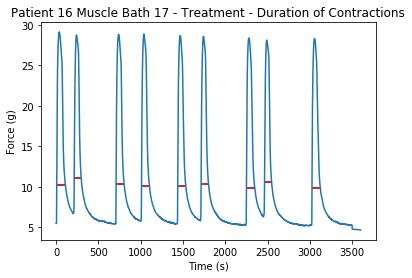

saved as: contractduration_patient16_bath17_treatment.pdf
contraction durations: [102  82  94  93  95  87  98  83  99]


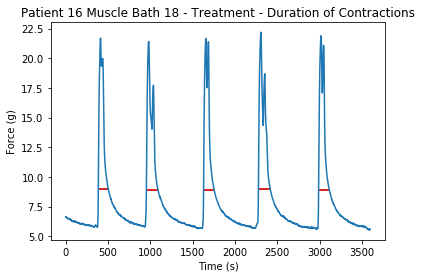

saved as: contractduration_patient16_bath18_treatment.pdf
contraction durations: [119 136 126 140 127]


In [344]:
#calculate duration of contractions
peakduration = []
treat_duration_titles = []
for mb in range(len(treat_array_list)):
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" duration times (s)"
    treat_duration_titles.append(title)
    templist = []
    #create figure to plot on
    f = plt.figure()
    plt.plot(np.array(treat_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Treatment - Duration of Contractions")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    widths = peak_widths(treat_array_list[mb],locmax_indx_treat_list[mb],rel_height=rel_height)
    for contraction in range(len(treat_locmax_list[mb])):
        leftx = ((widths[2][contraction]))
        rightx = ((widths[3][contraction]))
        templist.append(int(rightx-leftx))
        plt.hlines(*widths[1:], color="C3")
    plt.show()
    peakduration.append(np.array(templist))
    #save plots as pdf
    savestring = "contractduration_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_treatment"+'.pdf'
    print("saved as:",savestring)
    f.savefig('treatment_graphs/'+savestring,sep = '')
    print("contraction durations:",peakduration[mb])
#make a dictionary for treatment contractions duration time    
treat_contract_dur_time = dict(zip(treat_duration_titles,peakduration))

#### Relaxation Time

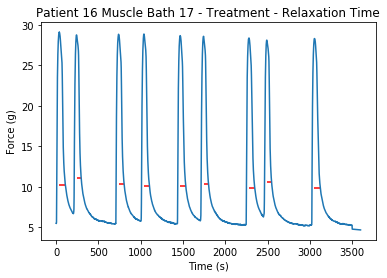

saved as: relaxtime_patient16_bath17_treatment.pdf
relaxation times: [70 54 64 64 66 58 67 56 70]


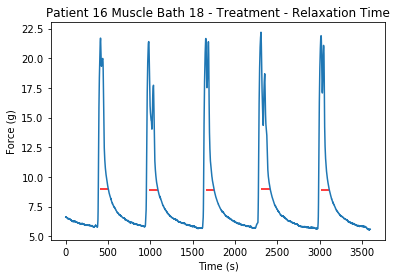

saved as: relaxtime_patient16_bath18_treatment.pdf
relaxation times: [ 93 109  99 110  98]


In [345]:
#relaxation time 
relaxtitle = []
relax_time = []
for mb in range(len(treat_array_list)):
    bath = df_ref.iloc[mb]["Bath Number"]
    title = "bath" + str(bath) +" relaxation times (s)"
    relaxtitle.append(title)
    widths = peak_widths(treat_array_list[mb],locmax_indx_treat_list[mb],rel_height=rel_height)
    relax = widths[3]-locmax_indx_treat_list[mb]
    relax = relax.astype(int)
    relax_time.append(relax)
    #create figure to plon on
    f = plt.figure()
    plt.plot(np.array(treat_array_list[mb]))
    #label plot
    plt.title("Patient "+list(df_ref['Patient'])[mb]+" Muscle Bath "+str(bath)+" - Treatment - Relaxation Time")
    plt.ylabel("Force (g)")
    plt.xlabel("Time (s)")
    for contract_num in range(len(locmax_indx_treat_list[mb])):
        right_basex = int(widths[3][contract_num])
        #right_basey = np.array(treat_array_list[mb])[right_basex]
        right_basey = widths[1][contract_num]
        plt.hlines(right_basey,locmax_indx_treat_list[mb][contract_num],right_basex, colors= 'r')
    plt.show()  
    #save plots as pdf
    savestring = "relaxtime_" + "patient"+(list(df_ref['Patient'])[mb])+"_"+"bath"+str(bath)+"_treatment"+'.pdf'
    print("saved as:",savestring)
    f.savefig('treatment_graphs/'+savestring,sep = '')
    print("relaxation times:",relax_time[mb])
#make a dictionary for treatment relaxation time    
treat_relax_time = dict(zip(relaxtitle,relax_time))

In [346]:
#export treatment peak data to Excel spreadsheet
#create a dataframe to store raw force data
df_t_raw = pd.DataFrame.from_dict(treatpeakdic, orient='index')
df_t_raw = df_t_raw.transpose()
#create a dataframe to store normalized data
df_t_norm = pd.DataFrame.from_dict(treatnormpeakdic, orient='index')
df_t_norm = df_t_norm.transpose()
#create a dataframe to store normalized to CSA data
df_t_norm2CSA = pd.DataFrame.from_dict(norm2CSA_dic, orient='index')
df_t_norm2CSA = df_t_norm2CSA.transpose()
#create a dataframe to store contraction duration time data
df_treat_contract_dur = pd.DataFrame.from_dict(treat_contract_dur_time, orient='index')
df_treat_contract_dur = df_treat_contract_dur.transpose()
#create a dataframe to store contraction relaxation time data
df_treat_relax = pd.DataFrame.from_dict(treat_relax_time, orient='index')
df_treat_relax = df_treat_relax.transpose()
#create output baseline dataframe
df_treat_out = df_t_raw.join(df_t_norm)
df_treat_out = df_treat_out.join(df_t_norm2CSA)
df_treat_out = df_treat_out.join(df_treat_contract_dur)
df_treat_out = df_treat_out.join(df_treat_relax)
print(df_treat_out.head())
#determine which set of muscle baths were used
if df_ref["Bath Number"].max() > 16:
    computer = "comp3"
elif df_ref["Bath Number"].max() < 9:
    computer = "comp1"
else: 
    computer = "comp2"
#write baseline dataframe to Excel spreadsheet
#assume tissue in set of 8 muscle baths comes from the 
#same patient 
treat_out_file = "Patient"+ list(df_ref['Patient'])[0] +"_treatment_"+computer+".xlsx"
df_treat_out.to_excel('treatment_output_files/'+treat_out_file)
print(treat_out_file)

   bath17 force (g)  bath18 force (g)  bath17 norm. to baseline function  \
0             23.04             15.54                           1.013806   
1             21.55             15.22                           0.948243   
2             22.54             15.59                           0.991805   
3             22.90             16.14                           1.007645   
4             22.70             15.87                           0.998845   

   bath18 norm. to baseline function  bath17 norm. to CSA (g/mm2)  \
0                           1.001504                        16.82   
1                           0.980881                        15.74   
2                           1.004726                        16.46   
3                           1.040172                        16.72   
4                           1.022771                        16.58   

   bath18 norm. to CSA (g/mm2)  bath17 duration times (s)  \
0                        11.41                      102.0   
1     

In [347]:
#4 parameters
#1. peak force or amplitude
#2. frequency or contractions/hour
#3. duration of contractions
#4. relaxation time

In [348]:
comments_file.close()